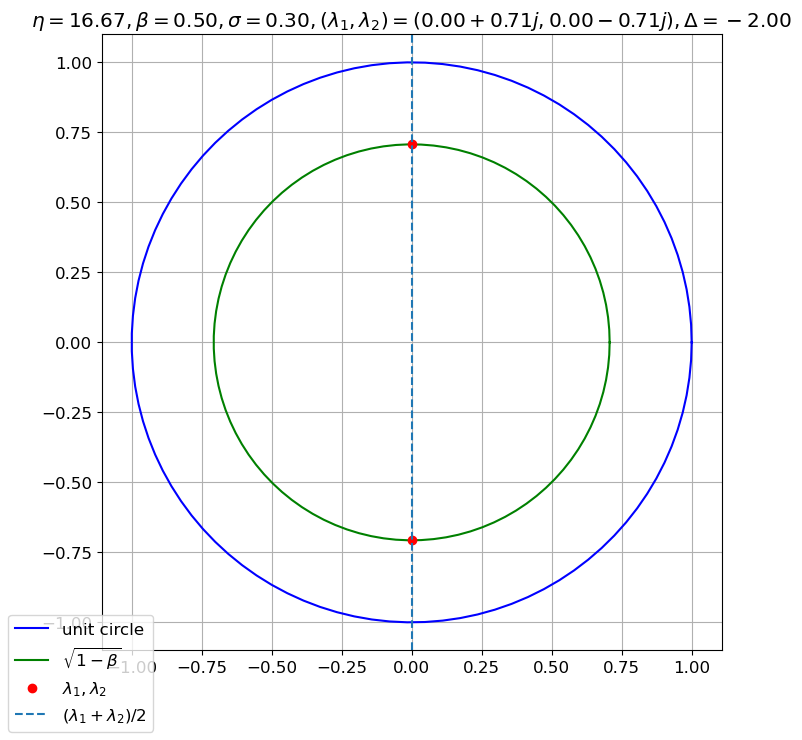

interactive(children=(FloatSlider(value=16.666666666666664, description='eta', max=35.61816576233783, min=0.86…

<function __main__.plot_function(eta)>

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interactive 
from matplotlib.widgets import Slider
import matplotlib.pyplot as plt
import numpy as np

beta = 0.5
sigma = 0.3

epsilon = 0.1
eta_1 = (2-beta - 2*np.sqrt(1-beta))/(2*beta*sigma**2)
eta_2 = (2-beta + 2*np.sqrt(1-beta))/(2*beta*sigma**2)
rad = 1.1

# Function to plot
def plot_function(eta):
    # Plot circle of radius 1
    t = np.linspace(0, 2*np.pi, 100)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(np.cos(t), np.sin(t), 'b-', label="unit circle")

    # Plot circle of radius sqrt(1-beta)
    t = np.linspace(0, 2*np.pi, 100) 
    r = np.sqrt(1 - beta)
    ax.plot(r*np.cos(t), r*np.sin(t), 'g-', label=r"$\sqrt{1-\beta}$")

    # Solve quadratic equation
    a = 1
    b = -(2 - beta - 2*eta*beta*sigma**2)  
    c = 1 - beta

    determinant = b**2 - 4*a*c
    lambdas = np.roots([a,b,c])

    # Plot quadratic equation solutions
    ax.plot(lambdas.real, lambdas.imag, 'ro', label=f"$\\lambda_1, \\lambda_2$")

    ax.vlines((lambdas[0]+lambdas[1])/2, -rad, rad, linestyles="dashed", label=f"$(\\lambda_1 + \\lambda_2)/2$")
    ax.set_title(f"$\\eta = {eta:.2f}, \\beta = {beta:.2f}, \\sigma = {sigma:.2f}, (\\lambda_1, \\lambda_2) = ({lambdas[0]:.2f}, {lambdas[1]:.2f}), \\Delta = {determinant:.2f}$")

    ax.axis('equal')
    ax.grid()

    ax.set_xlim(-rad, rad)
    ax.set_ylim(-rad, rad)
    fig.legend(loc="lower left")
    fig.canvas.draw_idle()

interact(plot_function, 
         eta=widgets.FloatSlider(min=eta_1/(1+epsilon), max=eta_2*(1+epsilon), step=(eta_2*(1+epsilon) - eta_1/(1+epsilon))/100, value=(eta_1+eta_2)/2))

The following code produces the diagram for the "Accelerating Gradient Descent with Momentum" problem. Run it, then use `ffmpeg -r 24 -pattern_type glob -i './*.png' -c:v libx264 -pix_fmt yuv420p video.mp4` to compile to a `mp4` video file in the produced directory.

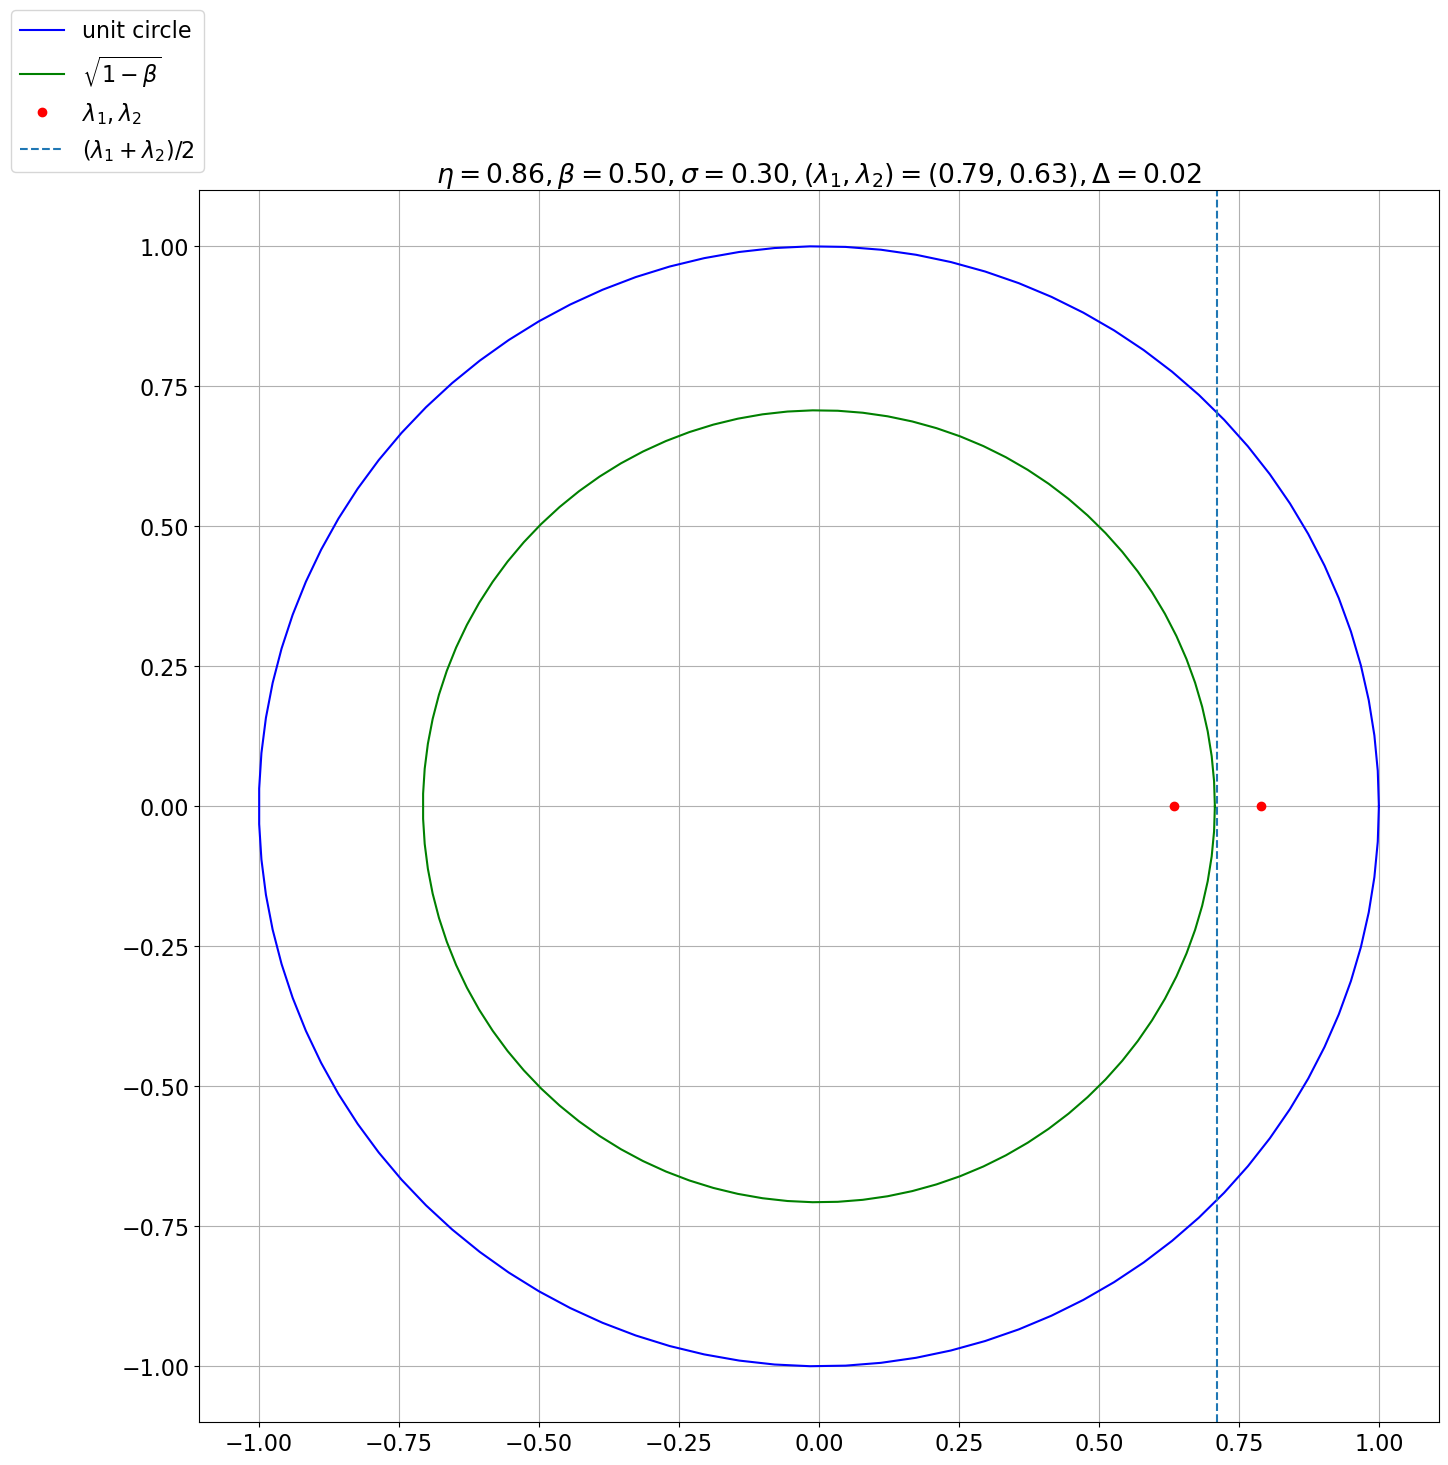

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os


beta = 0.5
sigma = 0.3

epsilon = 0.1
eta_1 = (2-beta - 2*np.sqrt(1-beta))/(2*beta*sigma**2)
eta_2 = (2-beta + 2*np.sqrt(1-beta))/(2*beta*sigma**2)

rad = 1.1
dir_path = f"./hw22"
frames = 240
for i, time in enumerate(np.linspace(0, np.pi, frames)):
    plt.rcParams.update({'font.size': 16})
    eta = (1 - epsilon) * eta_1 + ((1 + epsilon) * eta_2 - (1 - epsilon) * eta_1) * (1-np.cos(time))/2
    # Plot circle of radius 1
    t = np.linspace(0, 2*np.pi, 100)
    
    fig, ax = plt.subplots(figsize=(16,16))
    ax.plot(np.cos(t), np.sin(t), 'b-', label="unit circle")

    # Plot circle of radius sqrt(1-beta)
    t = np.linspace(0, 2*np.pi, 100) 
    r = np.sqrt(1 - beta)
    ax.plot(r*np.cos(t), r*np.sin(t), 'g-', label=r"$\sqrt{1-\beta}$")

    # Solve quadratic equation
    a = 1
    b = -(2 - beta - 2*eta*beta*sigma**2)  
    c = 1 - beta

    determinant = b**2 - 4*a*c
    lambdas = np.roots([a,b,c])

    # Plot quadratic equation solutions
    ax.plot(lambdas.real, lambdas.imag, 'ro', label=f"$\\lambda_1, \\lambda_2$")

    ax.vlines((lambdas[0]+lambdas[1])/2, -rad, rad, linestyles="dashed", label=f"$(\\lambda_1 + \\lambda_2)/2$")
    ax.set_title(f"$\\eta = {eta:.2f}, \\beta = {beta:.2f}, \\sigma = {sigma:.2f}, (\\lambda_1, \\lambda_2) = ({lambdas[0]:.2f}, {lambdas[1]:.2f}), \\Delta = {determinant:.2f}$")

    ax.axis('equal')
    ax.grid()

    ax.set_xlim(-rad, rad)
    ax.set_ylim(-rad, rad)
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    fig.savefig(f"{dir_path}/{i:03d}.png")
    fig.legend(loc="upper left")
    if i == 0:
        plt.show()
    plt.rcParams.update({'font.size': 12})
    plt.close()